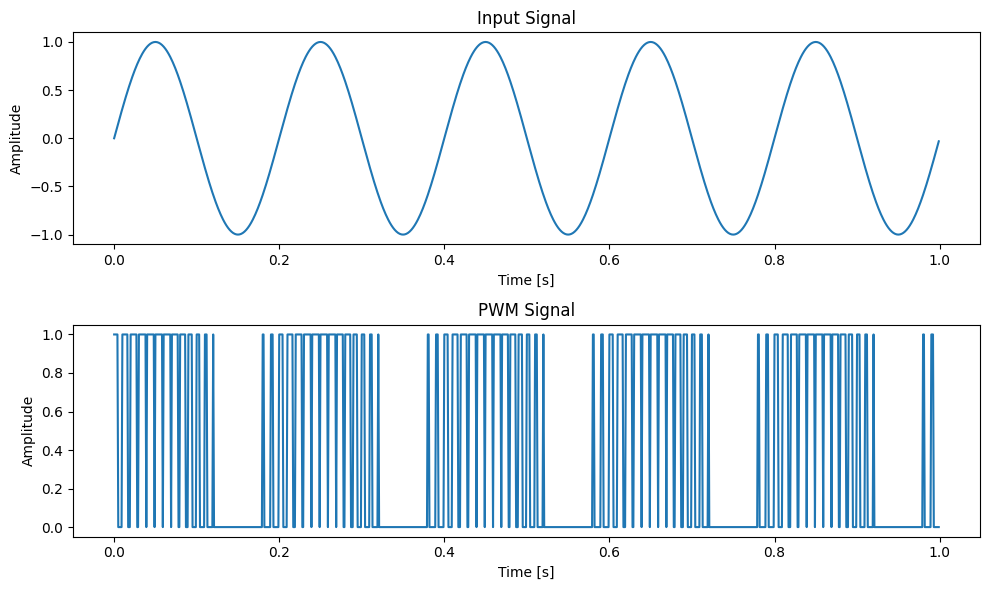

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pwm(signal, pwm_frequency, sampling_rate):
    """
    Generate a PWM signal from an input signal.

    :param signal: Input signal (1D array)
    :param pwm_frequency: Frequency of the PWM signal (Hz)
    :param sampling_rate: Sampling rate of the signal (Hz)
    :return: PWM signal (1D array)
    """
    # Calculate the period of the PWM signal in samples
    pwm_period = int(sampling_rate / pwm_frequency)
    
    # Initialize the PWM signal
    pwm_signal = np.zeros_like(signal)
    
    # Generate the PWM signal
    for i in range(len(signal)):
        # Calculate the duty cycle based on the input signal
        duty_cycle = (signal[i] - np.min(signal)) / (np.max(signal) - np.min(signal))
        
        # Determine the number of high samples in the PWM period
        high_samples = int(duty_cycle * pwm_period)
        
        # Generate the PWM signal for the current period
        if i % pwm_period < high_samples:
            pwm_signal[i] = 1
        else:
            pwm_signal[i] = 0
    
    return pwm_signal

# Example usage
if __name__ == "__main__":
    # Parameters
    sampling_rate = 1000  # Sampling rate in Hz
    duration = 1.0       # Duration of the signal in seconds
    pwm_frequency = 100  # PWM frequency in Hz
    
    # Generate a sample input signal (e.g., a sine wave)
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    input_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
    
    # Generate the PWM signal
    pwm_signal = generate_pwm(input_signal, pwm_frequency, sampling_rate)
    
    # Plot the input signal and the PWM signal
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, input_signal)
    plt.title("Input Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.subplot(2, 1, 2)
    plt.plot(t, pwm_signal)
    plt.title("PWM Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()